# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [47]:
# RCParams to make plots dark theme
# Skip this cell if you want to keep everything light
plt.rcParams['axes.facecolor'] = 'xkcd:dark gray'
plt.rcParams['figure.facecolor'] = 'xkcd:dark gray'
plt.rcParams['xtick.color'] = 'xkcd:light gray'
plt.rcParams['xtick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['ytick.color'] = 'xkcd:light gray'
plt.rcParams['ytick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['axes.edgecolor'] = 'xkcd:gray'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'xkcd:light gray'
plt.rcParams['text.color'] = 'xkcd:light gray'
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha": 0.3})

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | rio grande
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | umarkot
Processing Record 7 of Set 1 | taoudenni
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | papao
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | lembar
City not found. Skipping...
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | pyt-yakh
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | villanueva
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,291.36,88,100,2.24,PT,1699832766
1,rio grande,-32.0350,-52.0986,290.21,95,100,2.75,BR,1699832767
2,kavaratti,10.5669,72.6420,300.95,75,70,1.68,IN,1699832767
3,talnakh,69.4865,88.3972,271.60,96,100,4.29,RU,1699832768
4,hithadhoo,-0.6000,73.0833,300.54,79,93,2.52,MV,1699832769


In [30]:
# string for output path
out_path = "../output_data/"

In [17]:
# Export the City_Data into a csv
city_data_df.to_csv(f"{out_path}cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv(f"{out_path}cities.csv", index_col="City_ID")
# converting temperature to C (can't well redo it, only so many free API calls in a day)
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,18.21,88,100,2.24,PT,1699832766
1,rio grande,-32.0350,-52.0986,17.06,95,100,2.75,BR,1699832767
2,kavaratti,10.5669,72.6420,27.80,75,70,1.68,IN,1699832767
3,talnakh,69.4865,88.3972,-1.55,96,100,4.29,RU,1699832768
4,hithadhoo,-0.6000,73.0833,27.39,79,93,2.52,MV,1699832769


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [49]:
# get max date from dataset, according to local time (since I processed it on my own computer)
# could have isssues with cities on the other side of the International Date Line but that's not my problem right now.
date = time.localtime(city_data_df['Date'].max())
date_str = f"({date.tm_year}-{date.tm_mon}-{date.tm_mday})"

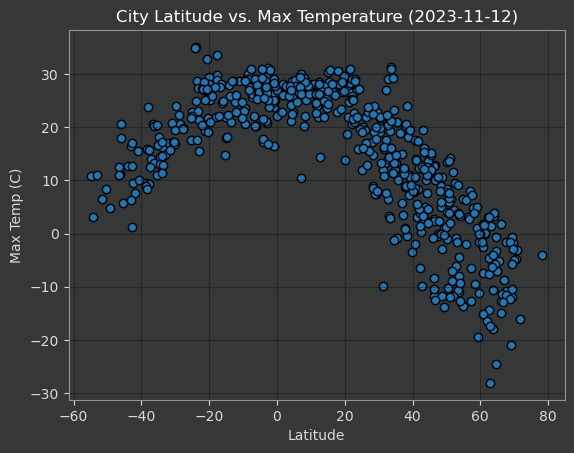

In [94]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='xkcd:black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {date_str}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig(f"{out_path}Fig-1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

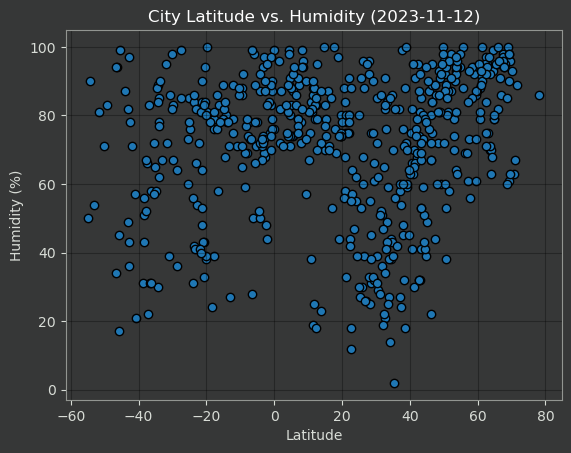

In [50]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='xkcd:black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {date_str}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig(f"{out_path}Fig-2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

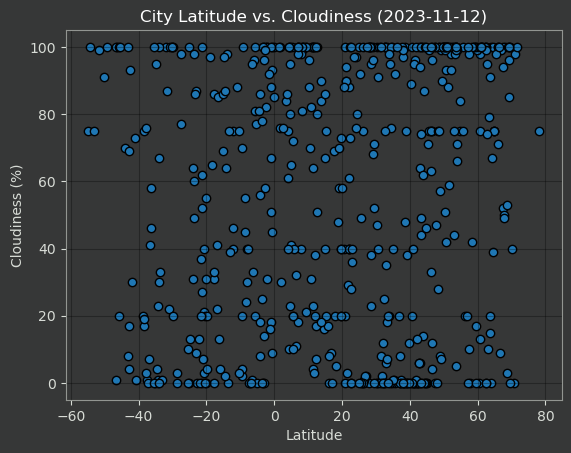

In [51]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='xkcd:black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {date_str}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig(f"{out_path}Fig-3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

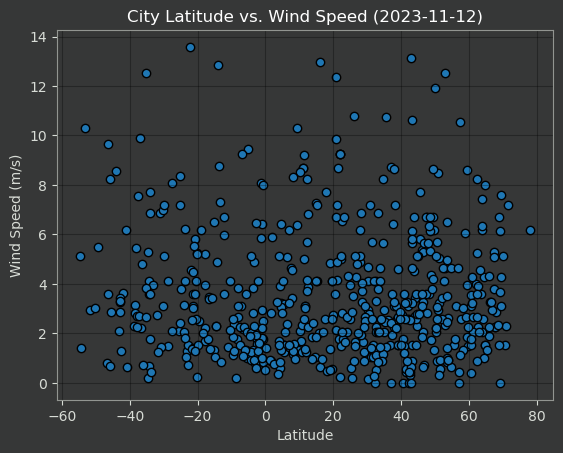

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='xkcd:black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {date_str}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig(f"{out_path}Fig-4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
def lin_reg_plt(x_vals, y_vals, title='', xlab='', ylab='', ann=(0, 0, '15')):

    (slope, intercept, rval, pval, stderr) = linregress(x_vals, y_vals)
    regress_vals = x_vals * slope + intercept
    
    plt.scatter(x_vals, y_vals, edgecolors='xkcd:black')
    plt.plot(x_vals, regress_vals, 'r-')
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (ann[0],ann[1]), color='r', fontsize=ann[2])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    print(f'R value is {rval:.2f}')

    return

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,18.21,88,100,2.24,PT,1699832766
2,kavaratti,10.5669,72.6420,27.80,75,70,1.68,IN,1699832767
3,talnakh,69.4865,88.3972,-1.55,96,100,4.29,RU,1699832768
5,umarkot,25.3616,69.7362,20.02,27,92,0.62,PK,1699832769
6,taoudenni,22.6783,-3.9836,26.55,18,0,6.54,ML,1699832770


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rio grande,-32.0350,-52.0986,17.06,95,100,2.75,BR,1699832767
4,hithadhoo,-0.6000,73.0833,27.39,79,93,2.52,MV,1699832769
7,grytviken,-54.2811,-36.5092,3.04,90,100,1.41,GS,1699832771
8,papao,-17.7500,-149.5500,29.82,79,31,5.20,PF,1699832771
11,carnarvon,-24.8667,113.6333,21.90,76,13,3.79,AU,1699832774


###  Temperature vs. Latitude Linear Regression Plot

R value is -0.86


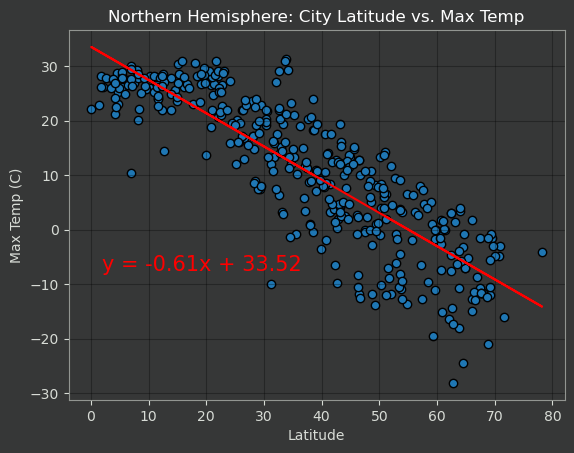

In [109]:
# Linear regression on Northern Hemisphere
lin_reg_plt(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
            ylab='Max Temp (C)', xlab='Latitude', title='Northern Hemisphere: City Latitude vs. Max Temp', 
            ann=(2, -7.5, 15))

R value is 0.74


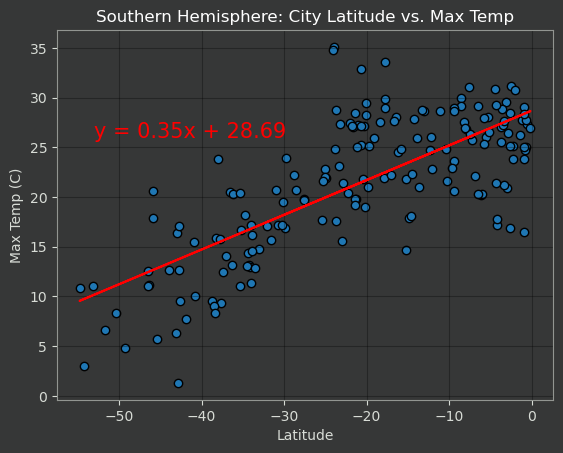

In [111]:
# Linear regression on Southern Hemisphere
lin_reg_plt(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
            ylab='Max Temp (C)', xlab='Latitude', title='Southern Hemisphere: City Latitude vs. Max Temp', 
            ann=(-53, 26, 15))

**Discussion about the linear relationship:** As the southern hemisphere data presents latitude in the negatives (by definition), we notice that the highest max temperatures tend to be for those closest to the equator across both data sets. These data appear to have a strong correlation (moreso in the Northern hemisphere than the southern, could be due to the higher number of cities to even out stragglers, assuming the relationship is more solid the more data points we have). City Altitude was not factored into these graphs or collected in the data, but would be another factor worth consideration in max temperature.

### Humidity vs. Latitude Linear Regression Plot

R value is 0.16


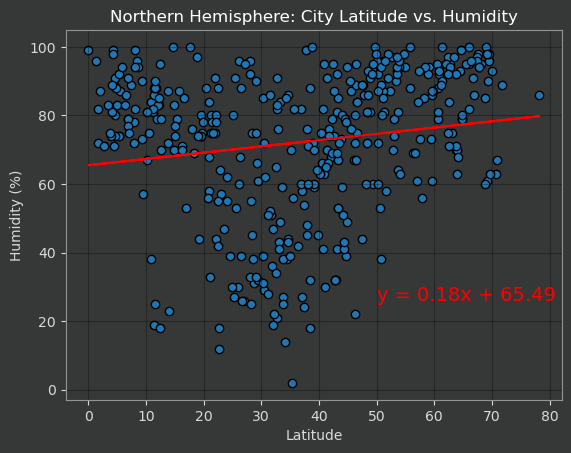

In [112]:
# Northern Hemisphere
lin_reg_plt(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
            ylab='Humidity (%)', xlab='Latitude', title='Northern Hemisphere: City Latitude vs. Humidity', 
            ann=(50, 26, 14))

R value is 0.24


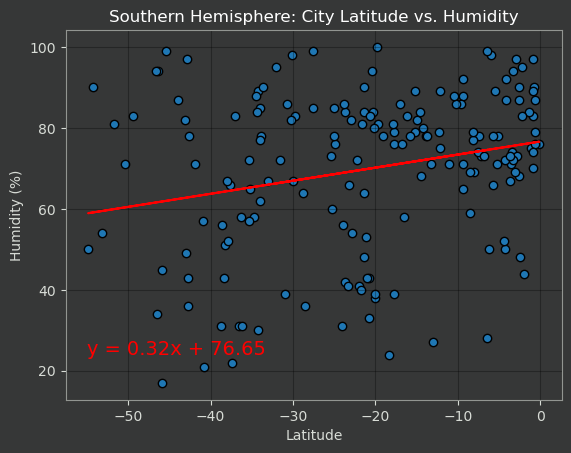

In [114]:
# Southern Hemisphere
lin_reg_plt(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
            ylab='Humidity (%)', xlab='Latitude', title='Southern Hemisphere: City Latitude vs. Humidity', 
            ann=(-55, 24, 14))

**Discussion about the linear relationship:** These metrics are only weakly correlated, but appear to suggest that humidity trends upwards with latitude. It also appears that, based on these data, the Southern Hemisphere is currently drier on average than the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R value is 0.09


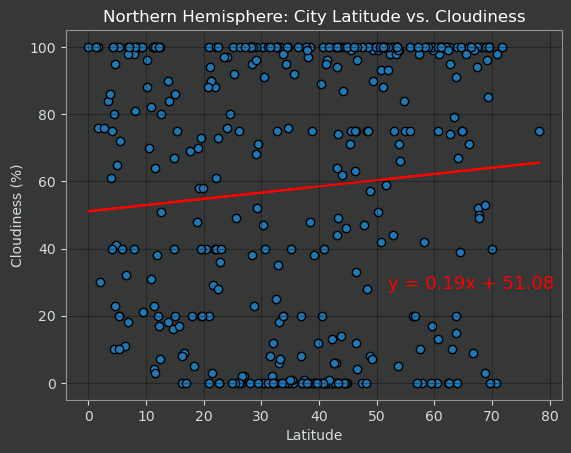

In [118]:
# Northern Hemisphere
lin_reg_plt(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
            ylab='Cloudiness (%)', xlab='Latitude', title='Northern Hemisphere: City Latitude vs. Cloudiness', 
            ann=(52, 28, 13))

R value is 0.00


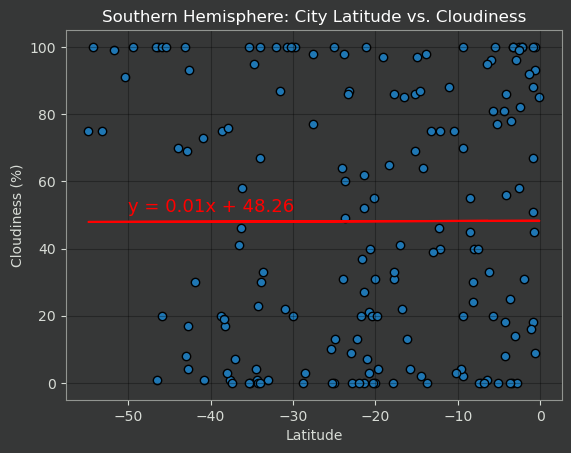

In [123]:
# Southern Hemisphere
lin_reg_plt(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
            ylab='Cloudiness (%)', xlab='Latitude', title='Southern Hemisphere: City Latitude vs. Cloudiness', 
            ann=(-50, 51, 13))

**Discussion about the linear relationship:** Based on these data, cloud coverage appears to be very random and not correlated with latitude. There could be a relationship in there somewhere, but especially since the data is bounded at a max cloud coverage of 100%, we cannot measure the true amount of clouds above any city at any given point (e.g., Cumulus full coverage vs Cumulonimbus, etc. etc.). It is also highly possible that there is a seasonal relationship, but that cannot be discerned from just one momentary snapshot of weather data.

### Wind Speed vs. Latitude Linear Regression Plot

R value is 0.02


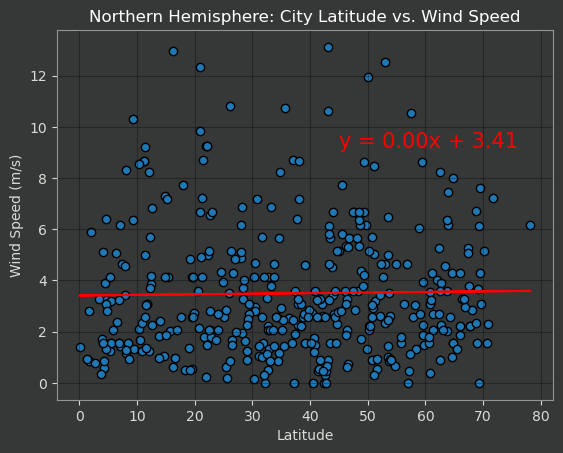

In [128]:
# Northern Hemisphere
lin_reg_plt(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
            ylab='Wind Speed (m/s)', xlab='Latitude', title='Northern Hemisphere: City Latitude vs. Wind Speed', 
            ann=(45, 9.2, 15))

R value is -0.18


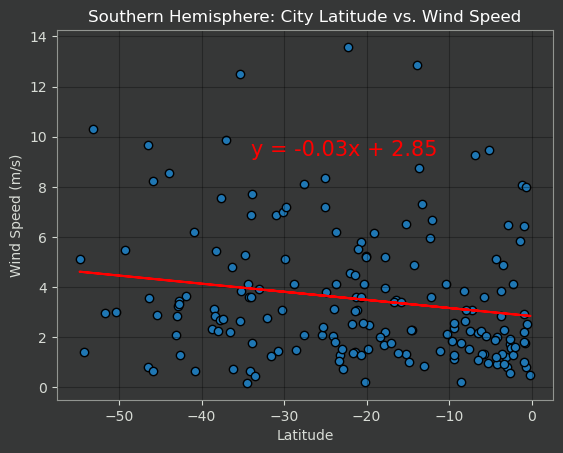

In [133]:
# Southern Hemisphere
lin_reg_plt(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
            ylab='Wind Speed (m/s)', xlab='Latitude', title='Southern Hemisphere: City Latitude vs. Wind Speed', 
            ann=(-34, 9.25, 15))

**Discussion about the linear relationship:** Similar to cloudiness, wind speed does not strongly correlate with latitude for either the Southern or Northern Hemispheres. Across the data, there *is* a weak negative correlation between these two metrics in the Southern Hemisphere, suggesting slightly stronger winds on average as one nears the south pole. That said, the correlation is weak enough that this relationship be taken with a kilograin of salt.